<a href="https://colab.research.google.com/github/Q-annnnn/USTH_Machine_learning_2/blob/main/Banknote_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt",
                 names = ["variance", "skewness", "curtosis","entropy", "class"])
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
data = df.iloc[:,0:4]
data

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [ ]:
target = df.iloc[:,4:]
target

,class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.9)

In [ ]:
X_train

,variance,skewness,curtosis,entropy
737,4.1542,7.27560,-2.47660,-1.20990
234,2.7296,2.87010,0.51124,0.50990
48,3.9102,6.06500,-2.45340,-0.68234
571,2.2517,-5.14220,4.29160,-1.24870
21,0.3292,-4.45520,4.57180,-0.98880
...,...,...,...,...
88,4.1197,-2.79560,2.07070,0.67412
789,1.0552,1.18570,-2.64110,0.11033
9,1.5356,9.17720,-2.27180,-0.73535
398,4.3937,0.35798,2.04160,1.20040


In [ ]:
y_train = np.ravel(y_train)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
knn_Y_pred1 = knn1.predict(X_test)
knn_accuracy1=metrics.accuracy_score(y_test,knn_Y_pred1)
knn_accuracy_pc1=knn_accuracy1*100
print("Error on training dataset of k = ",3 , ": {:.2f}%".format(100-knn_accuracy_pc1) )

Error on training dataset of k =  3 : 1.21%


In [ ]:
knnq = KNeighborsClassifier(n_neighbors = 3)
knnq.fit(X_train, y_train)
knn_Y_predq = knnq.predict(X_test)
knn_accuracyq=metrics.accuracy_score(y_test,knn_Y_predq)*100

print("Accuracy on training dataset : {:.2f}%".format(knn_accuracyq) )

Accuracy on training dataset : 98.79%


In [ ]:
for i in range (1,16):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  knn_Y_pred = knn.predict(X_test)
  knn_accuracy=metrics.accuracy_score(y_test,knn_Y_pred)
  knn_accuracy_pc=knn_accuracy*100
  print("Error on training dataset of k = ",i , ": {:.2f}%".format(100-knn_accuracy_pc) )

Error on training dataset of k =  1 : 1.13%
Error on training dataset of k =  2 : 1.38%
Error on training dataset of k =  3 : 1.21%
Error on training dataset of k =  4 : 1.38%
Error on training dataset of k =  5 : 1.38%
Error on training dataset of k =  6 : 1.86%
Error on training dataset of k =  7 : 2.35%
Error on training dataset of k =  8 : 2.67%
Error on training dataset of k =  9 : 2.59%
Error on training dataset of k =  10 : 3.56%
Error on training dataset of k =  11 : 2.67%
Error on training dataset of k =  12 : 3.48%
Error on training dataset of k =  13 : 2.91%
Error on training dataset of k =  14 : 3.81%
Error on training dataset of k =  15 : 3.24%


In [ ]:
normalized_x = normalize(data)

In [ ]:
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(normalized_x,target,test_size=0.9)

In [ ]:
n_y_train = np.ravel(n_y_train)

In [ ]:
for k in range (1,16):
  knn3 = KNeighborsClassifier(n_neighbors = k)
  knn3.fit(n_X_train, n_y_train)
  knn_Y_predn = knn3.predict(n_X_test)
  knn_accuracyn=metrics.accuracy_score(n_y_test,knn_Y_predn)
  knn_accuracy_pcn=knn_accuracyn*100
  print("Error on training dataset of k = ",k , ": {:.2f}%".format(100-knn_accuracy_pcn) )

Error on training dataset of k =  1 : 0.32%
Error on training dataset of k =  2 : 0.65%
Error on training dataset of k =  3 : 0.81%
Error on training dataset of k =  4 : 0.97%
Error on training dataset of k =  5 : 1.21%
Error on training dataset of k =  6 : 1.54%
Error on training dataset of k =  7 : 2.27%
Error on training dataset of k =  8 : 2.67%
Error on training dataset of k =  9 : 5.10%
Error on training dataset of k =  10 : 5.34%
Error on training dataset of k =  11 : 5.83%
Error on training dataset of k =  12 : 6.32%
Error on training dataset of k =  13 : 6.56%
Error on training dataset of k =  14 : 6.72%
Error on training dataset of k =  15 : 10.61%


In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardlizing features
datascaled = StandardScaler().fit_transform(data)

In [ ]:
#PCA 2D projection
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(datascaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf

,principal component 1,principal component 2,class
0,-1.472805,-1.163917,0
1,-1.639441,-1.093812,0
2,0.513919,-1.324880,0
3,-2.310952,-0.202514,0
4,1.193416,0.024654,0
...,...,...,...
1367,-0.221995,-0.290458,1
1368,1.909395,0.142149,1
1369,4.049327,2.036023,1
1370,3.019617,1.392140,1


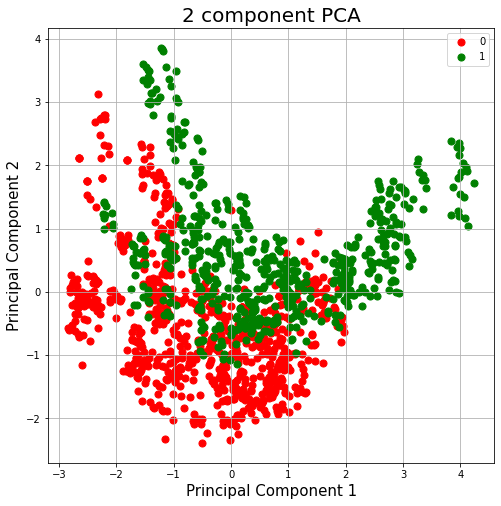

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

aims = [0,1]
colors = ['r', 'g']
for aim, color in zip(aims,colors):
    indicesToKeep = finalDf['class'] == aim
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(aims)
ax.grid()

In [ ]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(finalDf,target,test_size=0.9)
pca_y_train = np.ravel(pca_y_train)

In [ ]:
for j in range (1,16):
  knn4 = KNeighborsClassifier(n_neighbors = j)
  knn4.fit(pca_X_train, pca_y_train)
  knn_Y_predp = knn4.predict(pca_X_test)
  knn_accuracyp=metrics.accuracy_score(pca_y_test,knn_Y_predp)
  knn_accuracy_pcp=knn_accuracyp*100
  print("Error on training dataset of k = ",j , ": {:.2f}%".format(100-knn_accuracy_pcp) )

Error on training dataset of k =  1 : 0.08%
Error on training dataset of k =  2 : 0.08%
Error on training dataset of k =  3 : 0.08%
Error on training dataset of k =  4 : 0.08%
Error on training dataset of k =  5 : 0.08%
Error on training dataset of k =  6 : 0.40%
Error on training dataset of k =  7 : 0.40%
Error on training dataset of k =  8 : 2.51%
Error on training dataset of k =  9 : 2.75%
Error on training dataset of k =  10 : 2.67%
Error on training dataset of k =  11 : 2.02%
Error on training dataset of k =  12 : 2.43%
Error on training dataset of k =  13 : 1.54%
Error on training dataset of k =  14 : 2.11%
Error on training dataset of k =  15 : 2.35%


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = []
for l in range(1,16):
    knn6 = KNeighborsClassifier(n_neighbors=l)
    scores = cross_val_score(knn6, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append((l, scores.mean()))
best_k = max(cv_scores, key=lambda x: x[1])[0]
print('Best k:', best_k)
knn5 = KNeighborsClassifier(n_neighbors=best_k)
knn5.fit(X_train, y_train)
print('Testing accuracy:', knn5.score(X_test, y_test))

Best k: 1
Testing accuracy: 0.988663967611336


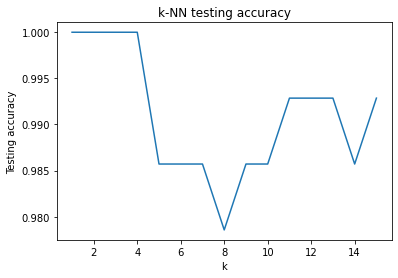

In [ ]:
ks, scores = zip(*cv_scores)
plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('Testing accuracy')
plt.title('k-NN testing accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import LeaveOneOut
for t in range(1, 16):
  knn7 = KNeighborsClassifier(n_neighbors=t)
  loo = LeaveOneOut()
  looscores = cross_val_score(knn7, data, np.ravel(target), cv=loo)
  error = 1 - looscores.mean()
  print("Classification error of k = ", t,":", error)

Classification error of k =  1 : 0.0007288629737609575
Classification error of k =  2 : 0.0007288629737609575
Classification error of k =  3 : 0.0007288629737609575
Classification error of k =  4 : 0.0
Classification error of k =  5 : 0.0
Classification error of k =  6 : 0.0
Classification error of k =  7 : 0.0
Classification error of k =  8 : 0.0
Classification error of k =  9 : 0.0
Classification error of k =  10 : 0.0
Classification error of k =  11 : 0.0
Classification error of k =  12 : 0.0
Classification error of k =  13 : 0.0
Classification error of k =  14 : 0.0
Classification error of k =  15 : 0.0
